In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Configura las variables de entorno para la API
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Usuarios\Usuario\.kaggle'

# Inicializa y autentica la API de Kaggle
api = KaggleApi()
api.authenticate()

# Descarga el dataset (esto crea un ZIP en la carpeta actual)
api.dataset_download_files('asaniczka/uk-optimal-product-price-prediction', path='.', unzip=True)

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

df.head()

Dataset URL: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [3]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [4]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [5]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [6]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [7]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [8]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [9]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

# All columns seem categorical, as there isn't a wide variability of values.

asin        2222742
title       2077591
category        296
dtype: int64

In [10]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [11]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

False

In [12]:
# DATA CLEANING
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [13]:
# Identifying columns in the dataframe where over 80% of the values are missing
df.columns[df.isnull().mean() > 0.8]

Index([], dtype='object')

In [14]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

In [15]:
# Removing the "Id" column from the dataframe
df.drop("uid", inplace=True, axis=1)

In [17]:
# UNIVARIATE ANALYSIS
# Frequency table for 'category'
frequency_table = df["category"].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df["category"].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Alexa Built-In Devices  

In [18]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_categorical["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [19]:
# Calculating the proportions for each value in 'my_table' and rounding the results to two decimal places
(my_table/my_table.sum()).round(2)

col_0,count
category,
3D Printers,0.00
3D Printing & Scanning,0.00
Abrasive & Finishing Products,0.00
Action Cameras,0.00
Adapters,0.00
...,...
Wind Instruments,0.00
Window Treatments,0.00
Women,0.01


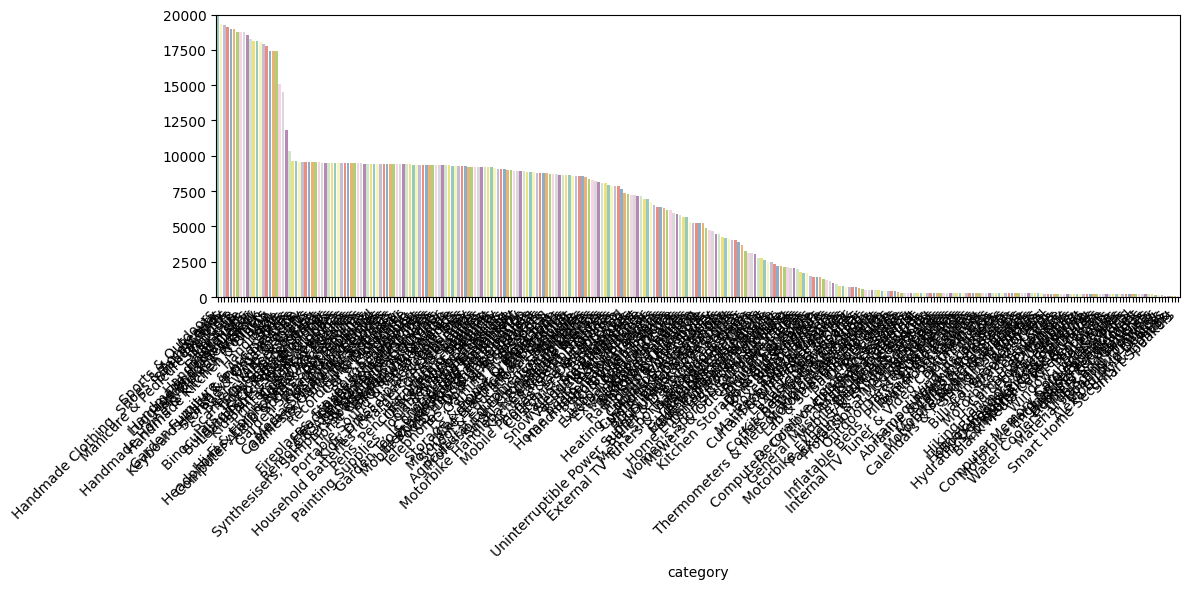

In [20]:
# VISUALIZATIONS

# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_table.index, y=frequency_table.values, hue=frequency_table.index, palette="Set3", legend=False)
plt.ylim(0, 20000)  # Ajusta el 100 al límite superior que desees
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


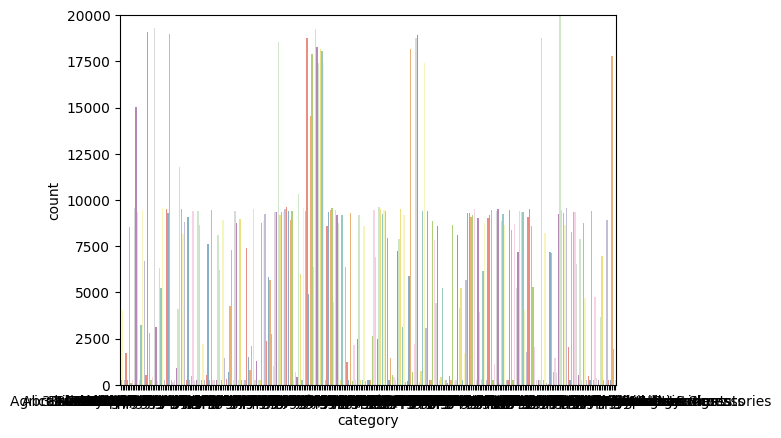

In [21]:
# Plotting a bar chart using the 'count' values from 'my_table', with colors sourced from the "Set3" palette
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3", hue=my_table.index);
plt.ylim(0, 20000) 
plt.show()

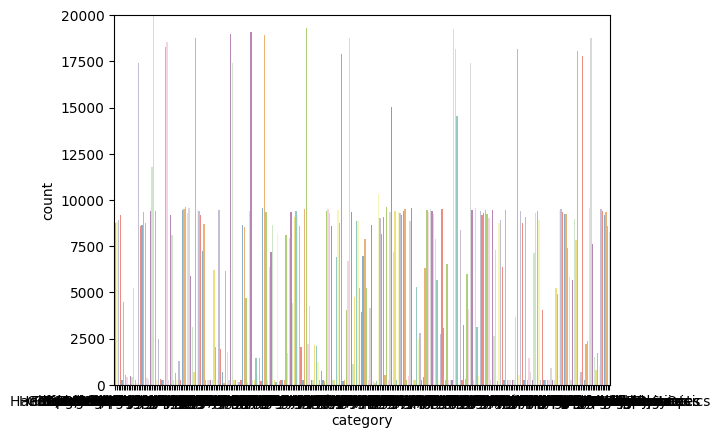

In [22]:
# Plotting a count plot for the 'category' column from the dataframe 'df', using the "Set3" palette for coloring
sns.countplot(data=df, x='category', palette="Set3", hue='category', legend=False);
plt.ylim(0, 20000) 
plt.show()

<Axes: ylabel='count'>

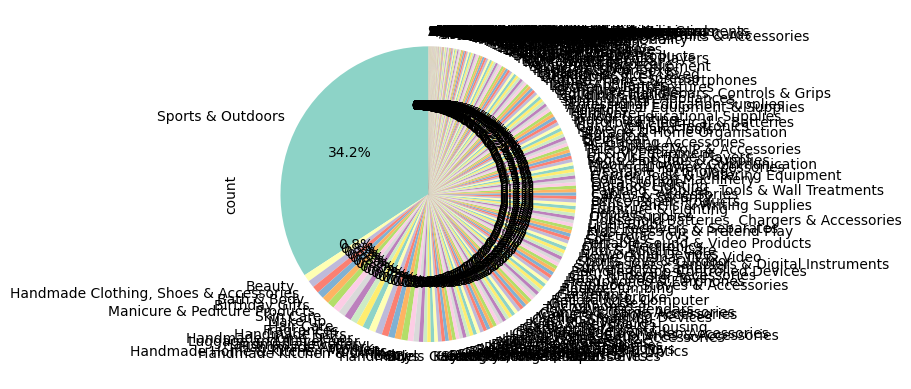

In [23]:
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Top 5 categorías:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


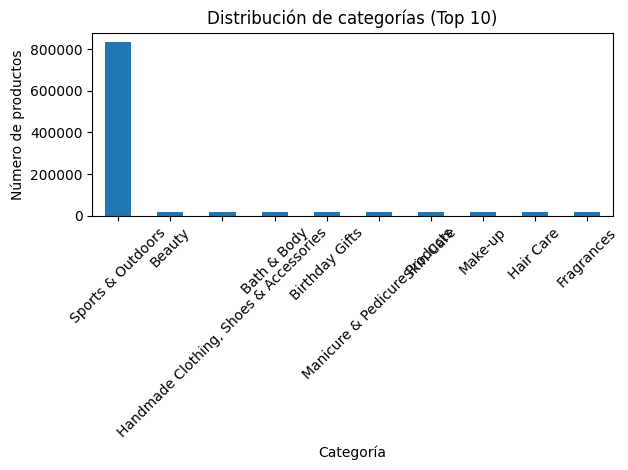

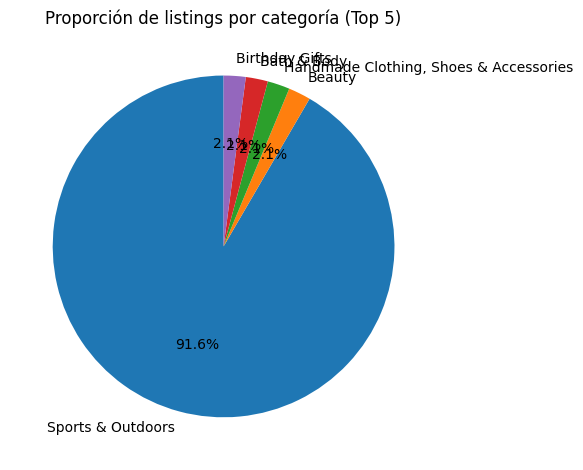

In [24]:
# Top 5 categorías por número de listings
freq_table = df['category'].value_counts(dropna=False)
top5 = freq_table.head(5)
print("Top 5 categorías:\n", top5)

# Barras para Top 10 categorías
topN = 10
freq_table.head(topN).plot(kind='bar', rot=45)
plt.title(f"Distribución de categorías (Top {topN})")
plt.xlabel("Categoría")
plt.ylabel("Número de productos")
plt.tight_layout()
plt.show()

# Pie para Top 5 (para legibilidad)
top5.plot(kind='pie', autopct='%1.1f%%', ylabel='', startangle=90)
plt.title("Proporción de listings por categoría (Top 5)")
plt.tight_layout()
plt.show()


In [ ]:
# Respuesta de Negocio: Las categorías están muy desbalanceadas (hay categorías con muchísimos listings y una larga cola de categorías
# minoritarias)
# Mostrar Top 5 y Top 10 ayuda a identificar rápidamente dónde se concentra la oferta.

In [65]:
# Summary statistics for the dataset
df.describe()

,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [25]:
# Measures of centrality

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(np.float64(89.24380943923663), np.float64(19.09), np.float64(9.99))

In [26]:
# Measures of dispersion

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(np.float64(119445.48532254907),
 np.float64(345.60886175349884),
 np.float64(0.0),
 np.float64(100000.0),
 np.float64(100000.0),
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [27]:
#Shape of distribution

skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(np.float64(27.492977566280338), np.float64(4241.616412866518))

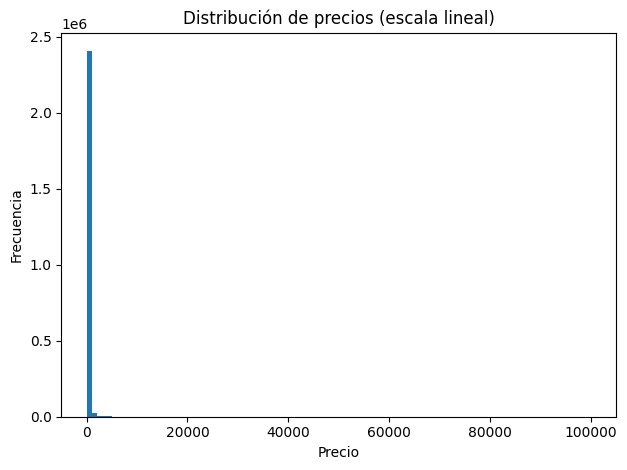

In [28]:
# Histograma de precios (lineal): puede ser poco legible por outliers
plt.figure()
df['price'].dropna().plot(kind='hist', bins=100)
plt.title("Distribución de precios (escala lineal)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

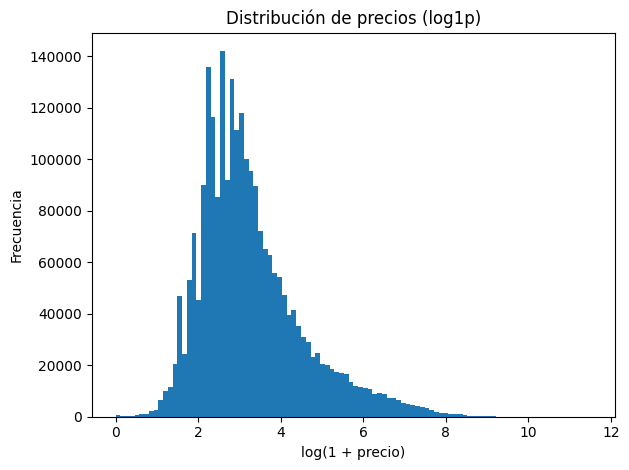

In [29]:
# Histograma en escala log (mejora legibilidad en cola larga)
plt.figure()
np.log1p(df['price'].dropna()).plot(kind='hist', bins=100)
plt.title("Distribución de precios (log1p)")
plt.xlabel("log(1 + precio)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

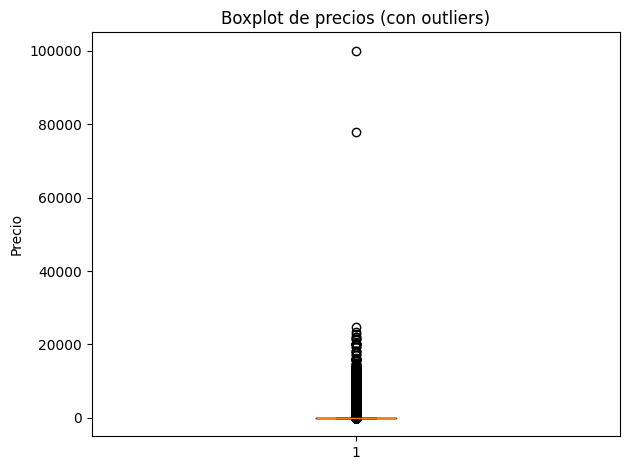

In [30]:
# Boxplot con límite superior para enfocar el grueso
plt.figure()
plt.boxplot(df['price'].dropna(), vert=True, showfliers=True)
plt.title("Boxplot de precios (con outliers)")
plt.ylabel("Precio")
plt.tight_layout()
plt.show()

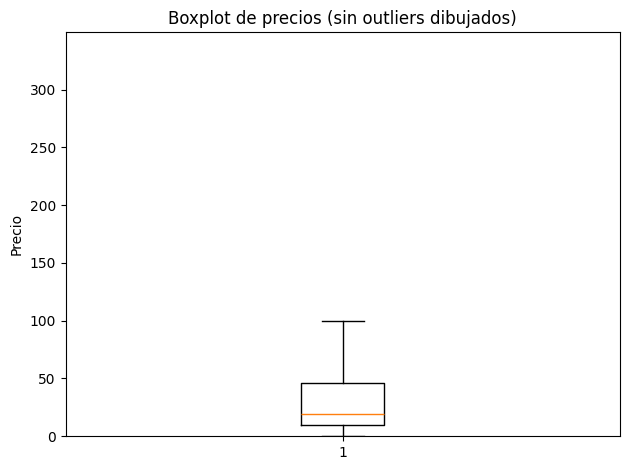

In [31]:
# (Opcional) Boxplot con recorte del eje Y para ver el cuerpo central
plt.figure()
plt.boxplot(df['price'].dropna(), vert=True, showfliers=False)
plt.title("Boxplot de precios (sin outliers dibujados)")
plt.ylabel("Precio")
plt.ylim(0, df['price'].quantile(0.95))  # enfocar hasta el p95
plt.tight_layout()
plt.show()

In [ ]:
# Respuesta de Negocio: La distribución de precios es muy asimétrica, con una larga cola de precios altos.
# Mostrar histograma en escala logarítmica y boxplot sin outliers ayuda a entender mejor la distribución del grueso de precios.
# Precio promedio (~89€) muy superior a la mediana (~19€) y moda (~9.99€) → el mercado tiene muchos productos baratos y unos pocos muy caros que 
# elevan la media.
# Alta dispersión + skew/kurtosis elevadas → hay gran variabilidad y outliers importantes. Para decisiones de pricing, mediana/IQR son métricas más 
# robustas que la media

In [32]:
# Asegúrate de que 'stars' es numérico
ratings = pd.to_numeric(df['stars'], errors='coerce').dropna()

In [33]:
# Centralidad
mean_r = ratings.mean()
median_r = ratings.median()
mode_r = ratings.mode().iloc[0] if not ratings.mode().empty else np.nan
print("Ratings - mean, median, mode:", mean_r, median_r, mode_r)

Ratings - mean, median, mode: 2.152836472966065 0.0 0.0


In [34]:
# Dispersión
var_r = ratings.var()
std_r = ratings.std()
q1_r, q3_r = ratings.quantile([0.25, 0.75])
iqr_r = q3_r - q1_r
print("Ratings - var, std, IQR:", var_r, std_r, iqr_r)

Ratings - var, std, IQR: 4.817434029796862 2.1948653785134207 4.4


In [35]:
# Forma de la distribución
skew_r = ratings.skew()
kurt_r = ratings.kurtosis()
print("Ratings - skewness, kurtosis:", skew_r, kurt_r)

Ratings - skewness, kurtosis: 0.08120735761080985 -1.9260061280432985


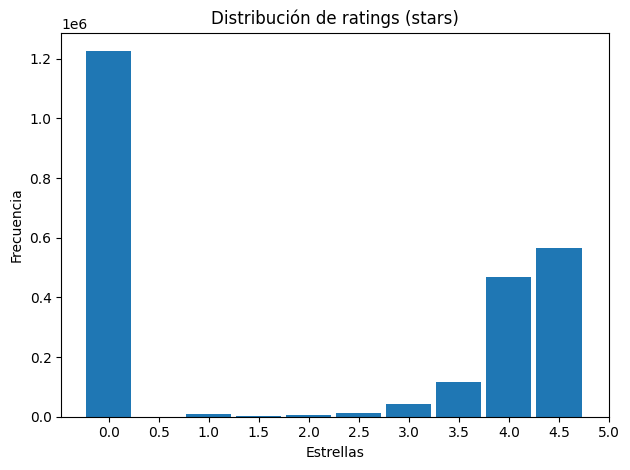

In [36]:
# Histograma (los ratings suelen ir de 0 a 5; ajusta bins según granularidad .5 o .1)
plt.figure()
plt.hist(ratings, bins=np.arange(0, 5.5, 0.5), align='left', rwidth=0.9)
plt.title("Distribución de ratings (stars)")
plt.xlabel("Estrellas")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
# Respuesta de Negocio: La mayoría de los productos tiene ratings bajos (0 estrellas) y hay ciertos productos con ratings altos (4-5 estrellas).
# Los productos con ratings medios (1-3 estrellas) son pocos.
# Se recomienda investigar más a fondo los productos con ratings altos para entender qué los hace destacar.

